# California Housing Prices

Data tersebut berisi informasi dari sensus di California. Data berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan tentang mereka berdasarkan data sensus. Data harus dibersihkan sehingga ada beberapa langkah pra-pemrosesan yang diperlukan! Kolomnya adalah sebagai berikut :

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- ocean_proximity
- median_house_value

<br>
Tujuannya adalah untuk memprediksi nilai median harga rumah untuk setiap distrik

## Library

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
# Load dataset

df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


## EDA

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info() #terdapat missing value di kolom total_bedroom 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
# melihat jumlah value di data ocean_proximity 
df['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

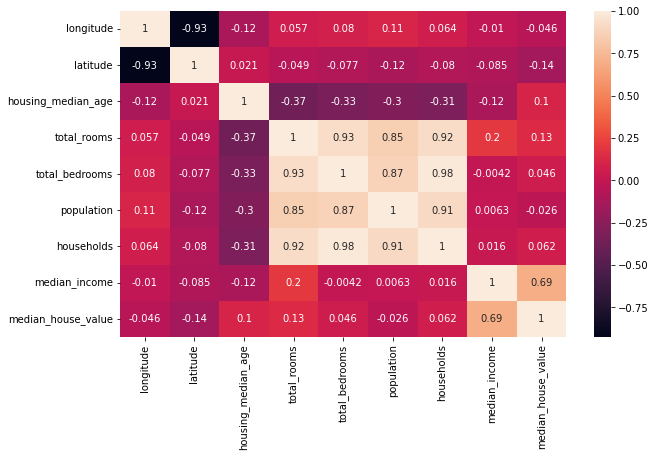

In [7]:
# agar mudah dibaca kita buat heatmap dari data yg sudah di correlasikan

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045915
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64

<AxesSubplot:>

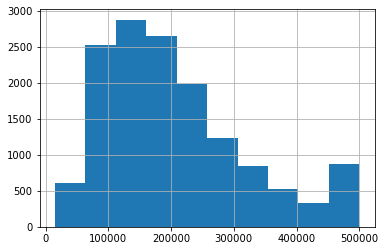

In [9]:
df.median_house_value.hist()

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

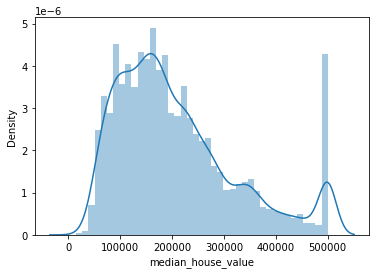

In [10]:
# terdapat outliers yg dapat mempengaruhi pemodelan

sns.distplot(df.median_house_value)

#### Median House Value terletak di antara 100000 dan 300000

### Location

Text(0.5, 1.0, 'Ocean Proximity')

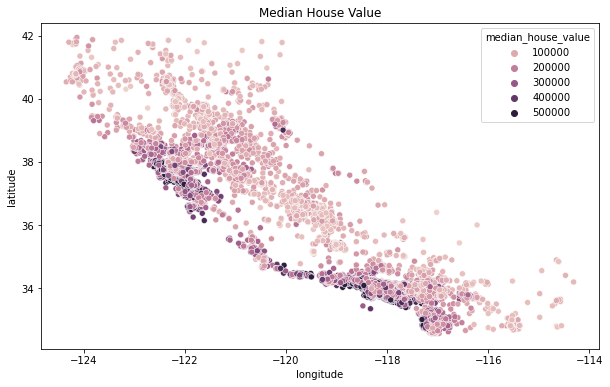

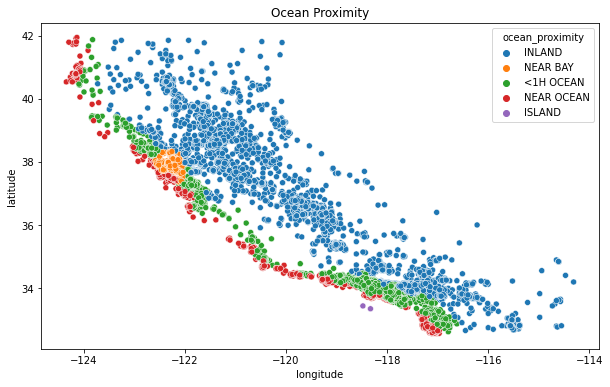

In [11]:
# Plot lokasi 'Median House Value'
plt.figure(figsize=(10,6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['median_house_value']).set_title('Median House Value')

# Plot persebaran 'ocean_proximity'
plt.figure(figsize=(10,6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title('Ocean Proximity')


dari 2 tabel di atas bisa dibilang median house value semakin ke arah pantai harganya semakin mahal atau tinggi

## Data Cleanning

In [12]:
# cek missing value
# terdapat 137 missing Value
df.isna().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

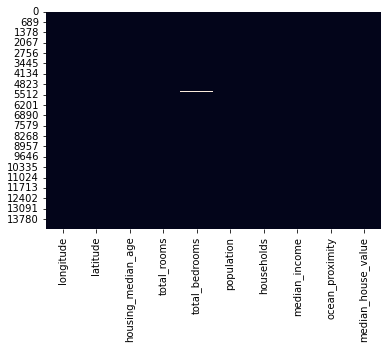

In [13]:
sns.heatmap(df.isnull(), cbar=False);

In [14]:
#statistics of missing values column
df['total_bedrooms'].describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Text(0, 0.5, 'frequency')

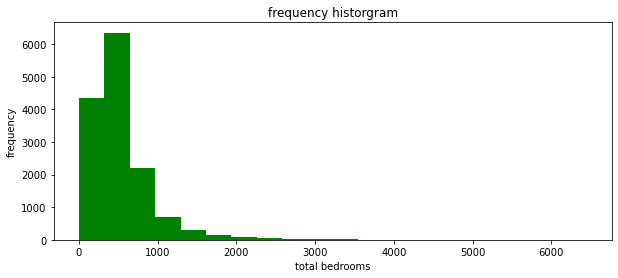

In [15]:
plt.figure(figsize=(10,4))
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'],bins=20,color='green')#histogram of totalbedrooms

#data mempunyai outliers

(df['total_bedrooms']>4000).sum()
plt.title('frequency historgram')
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

### Data memiliki terlalu banyak outlier Oleh karena itu mengisi Missing Value dengan mean akan mempengaruhi prediksi

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

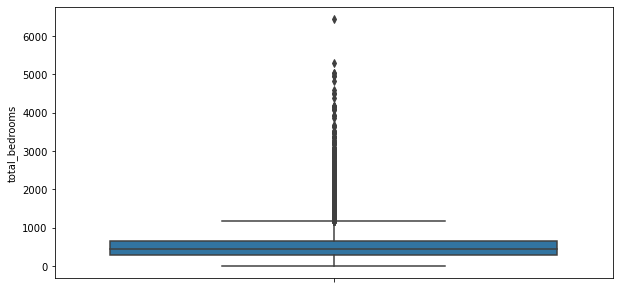

In [16]:
# cek outliers total_bedrooms
# boxplot on total_bedrooms

plt.figure(figsize=(10,5))
sns.boxplot(y='total_bedrooms',data=df)
plt.plot


- karena terlalu banyak Data outliers di kolom total_bedroom kita akan menggunakan Median untuk mengisi missing value

Untuk mengisi kolom Total_bedroom:
- Kita akan menghitung median untuk total_bedrooms berdasarkan kategori kolom ocean_proximity

In [17]:
def calc_categorical_median(x):
    """this function fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calc_categorical_median(df)

In [18]:
#recheck data kembali untuk memastikan sudah terisi missing value dengan nilai rata2
#checking missing values again
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


### Cek duplikat

In [19]:
# cek duplikat
df.duplicated().sum()

0

### histogram of dependent feature

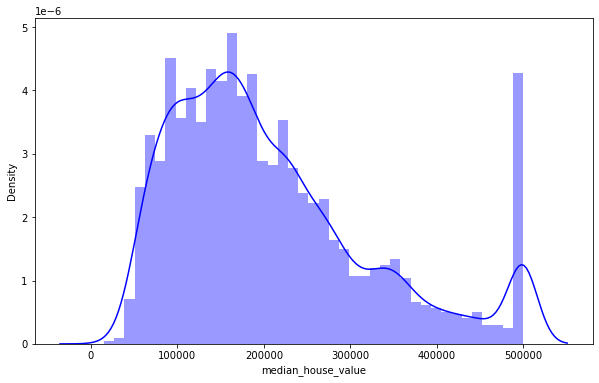

In [20]:
#kita dapat melihat area di mana frekuensi harga rata-rata untuk >= 500.000 lebih banyak dan bisa menjadi data outlier

plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='blue')
plt.show()

[]

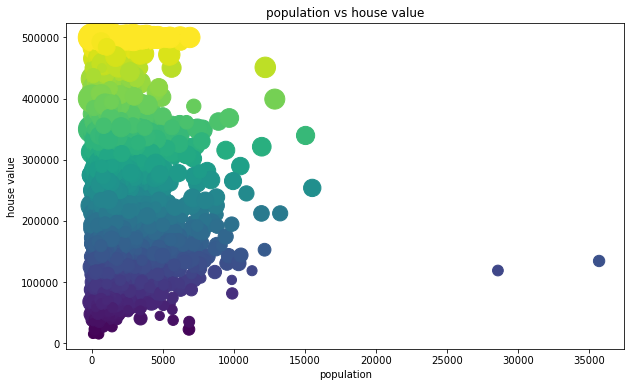

In [21]:
# cek outlier dari kolom yg mempengaruhi median_house_value (Dependent varialbel)

plt.figure(figsize=(10,6))

plt.scatter(df['population'],df['median_house_value'],c=df['median_house_value'],s=df['median_income']*50)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

### Menghilangkan atau menghapus Outliers

In [22]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    678
500000.0     18
475000.0      7
483300.0      6
456300.0      3
Name: median_house_value, dtype: int64

In [23]:
df=df.loc[df['median_house_value']<500001,:]

In [24]:
df=df[df['population']<25000]

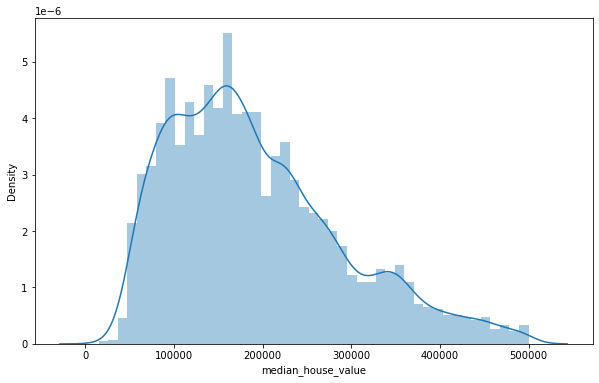

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])
plt.show()

### scatter plot on coordinates(latitude and longitude)

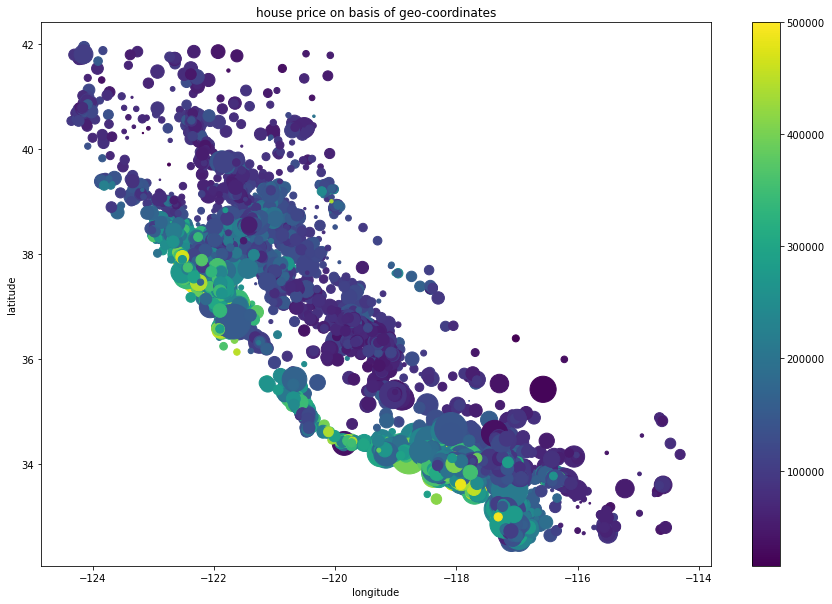

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

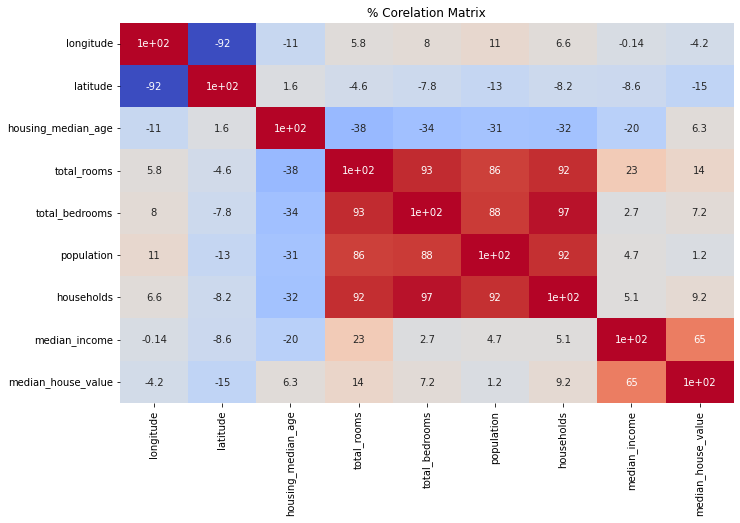

In [27]:
#corelation matrix

plt.figure(figsize=(11,7))

sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [28]:
# urutan yang paling berkorelasi terhadap Median House Value dalam (%)

(df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value)*100

#df.corr()*100

median_house_value    100.000000
median_income          64.647365
total_rooms            14.103075
households              9.214334
total_bedrooms          7.223559
housing_median_age      6.345219
population              1.174072
longitude              -4.212601
latitude              -15.151871
Name: median_house_value, dtype: float64

[]

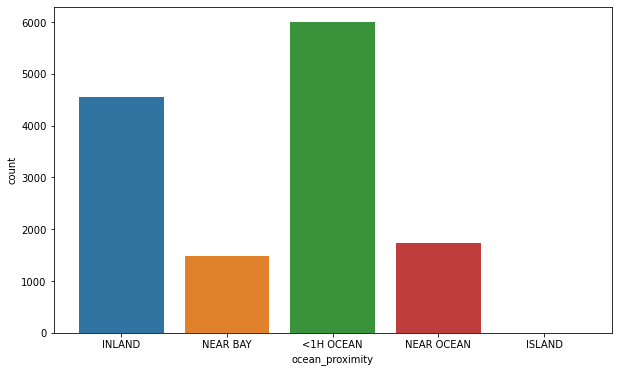

In [29]:
#barplot on ocean_proximity categories

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

[]

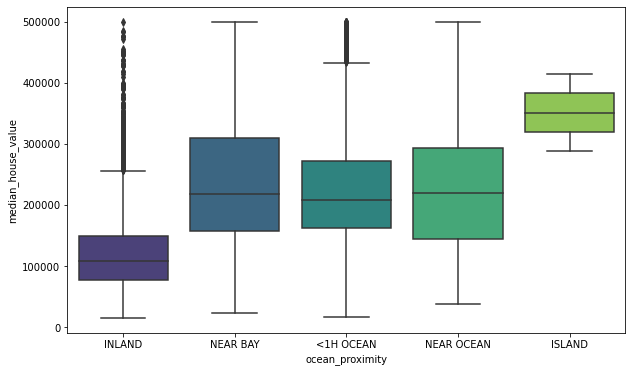

In [30]:
#boxplot of house value on ocean_proximity categories

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

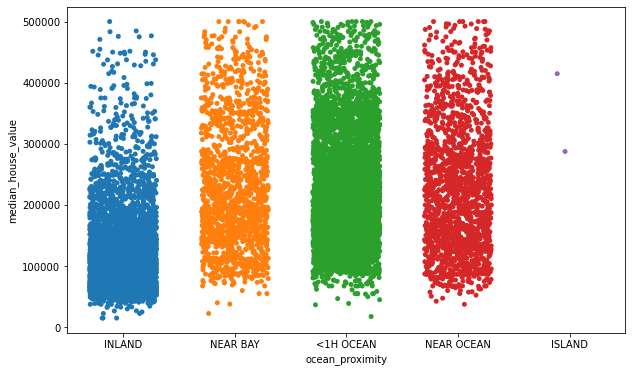

In [31]:
# kernel density estimation of ocean_proximity vs median_house_value

plt.figure(figsize=(10,6))

sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)



## Preprocessing

### Feature Selection

In [32]:
# converting ocean_proximity to dummies
# membuat tabel baru yaitu 'income per working population'
# 'bed per house' dan 'h/p'

df = pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)

df['income per working population'] = df['median_income']/(df['population']-df['households'])

df['bed per house'] = df['total_bedrooms']/df['total_rooms']

df['h/p'] = df['households']/df['population']

In [33]:
def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
    
df = pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_building),drop_first=True)],axis=1)


In [34]:
# Menentukan X dan y 

X = df.drop('median_house_value',axis=1).values
y = df['median_house_value'].values

### Tranning and Testing sampling

In [35]:
#import Library
from sklearn.model_selection import train_test_split

# test size 70:30 dan random_state=0
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size =0.3,
    random_state =0
)

### Normalising data atau Scaling

In [36]:
#import Library
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

### Feature Dimentional Reduction and Visualization

### Visualising data using PCA

In [37]:
def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,X_train.shape[1]):
        p= PCA(n_components=i+1)
        p.fit(x)
        total =total+p.explained_variance_ratio_[i]
        clist.append(total)
        
    return clist
X_train_variance =list(map(lambda x:x*100,c_variance(X_train)))

### Comulative Variance Curve

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

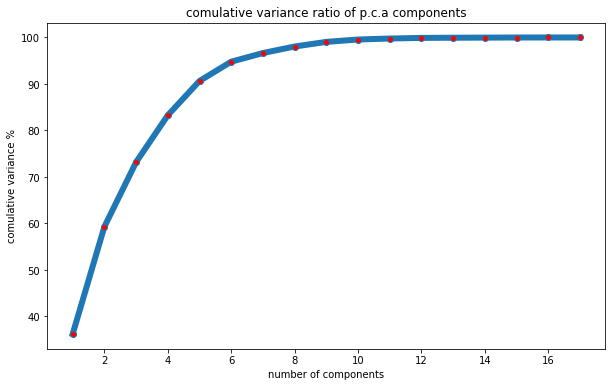

In [38]:
plt.figure(figsize=(10,6))

plt.plot(np.arange(1,X_train.shape[1]+1),X_train_variance,marker='o',markerfacecolor='red',lw=6)

plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

- di sini kita dapat melihat bahwa dengan 2 komponen utama, kita mendapatkan varians 54%


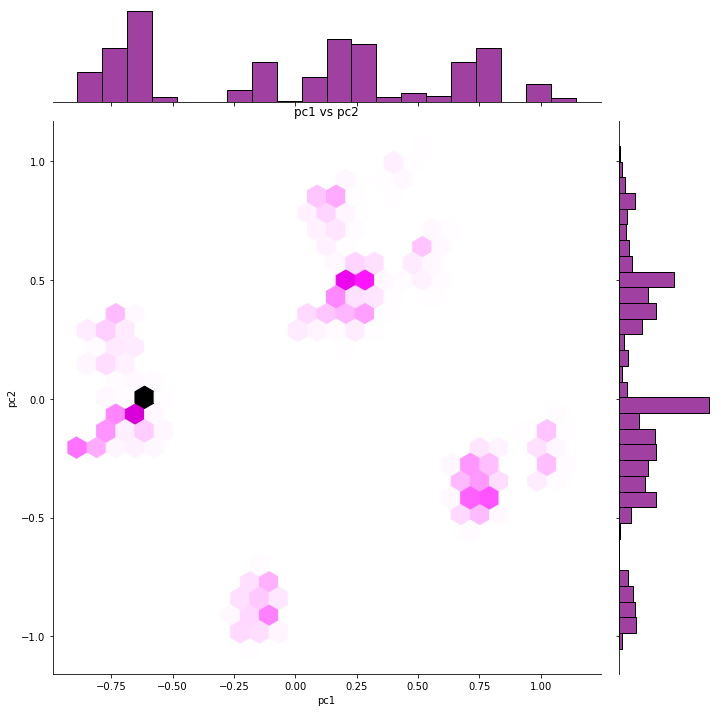

In [39]:
pca = PCA(n_components=2)

pca.fit(X_train)
sns.jointplot(data={'pc1':pca.fit_transform(X_train)[:,0],'pc2':pca.fit_transform(X_train)[:,1]},x='pc1',y='pc2',size=10,kind='hex',color='purple')
plt.title('pc1 vs pc2')
plt.show()

### Clustering first two principle components

Applying K means

In [40]:
p_train = pca.fit_transform(X_train)

In [41]:
best = []
for i in range(1,10):
    k = KMeans(n_clusters=i)
    k.fit(X_train)
    best.append(k.inertia_)

In [42]:
best

[9071.432405611662,
 6109.687219522406,
 4676.424744554368,
 3853.2172728374185,
 3058.641803781814,
 2561.24709574153,
 1977.2967715158845,
 1619.4155423763805,
 1372.6221268712256]

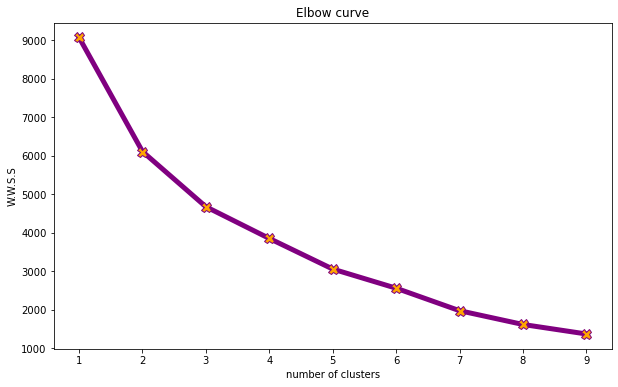

In [43]:
plt.figure(figsize=(10,6))

plt.plot(np.arange(1,len(best)+1),best,marker='X',markerfacecolor='orange',markersize=10,lw=5,color='purple')

plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('W.W.S.S')

plt.show()

Di sini kita dapat melihat bahwa 3 adalah jumlah cluster yang paling optimal

In [44]:
k = KMeans(n_clusters =4)
k_pred = k.fit_predict(X_train)

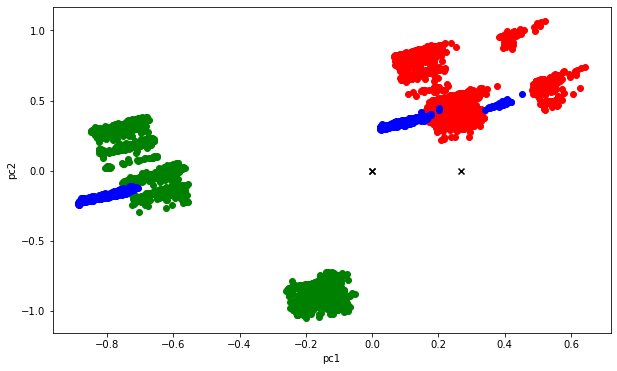

In [45]:
plt.figure(figsize=(10,6))
color=['red','green','blue','pink']

for i in range(3):
    
    plt.scatter(p_train[k_pred==i][:,0],p_train[k_pred==i][:,1],c=color[i])
    plt.scatter(k.cluster_centers_[i,0],k.cluster_centers_[i,1],c='black',marker='x')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

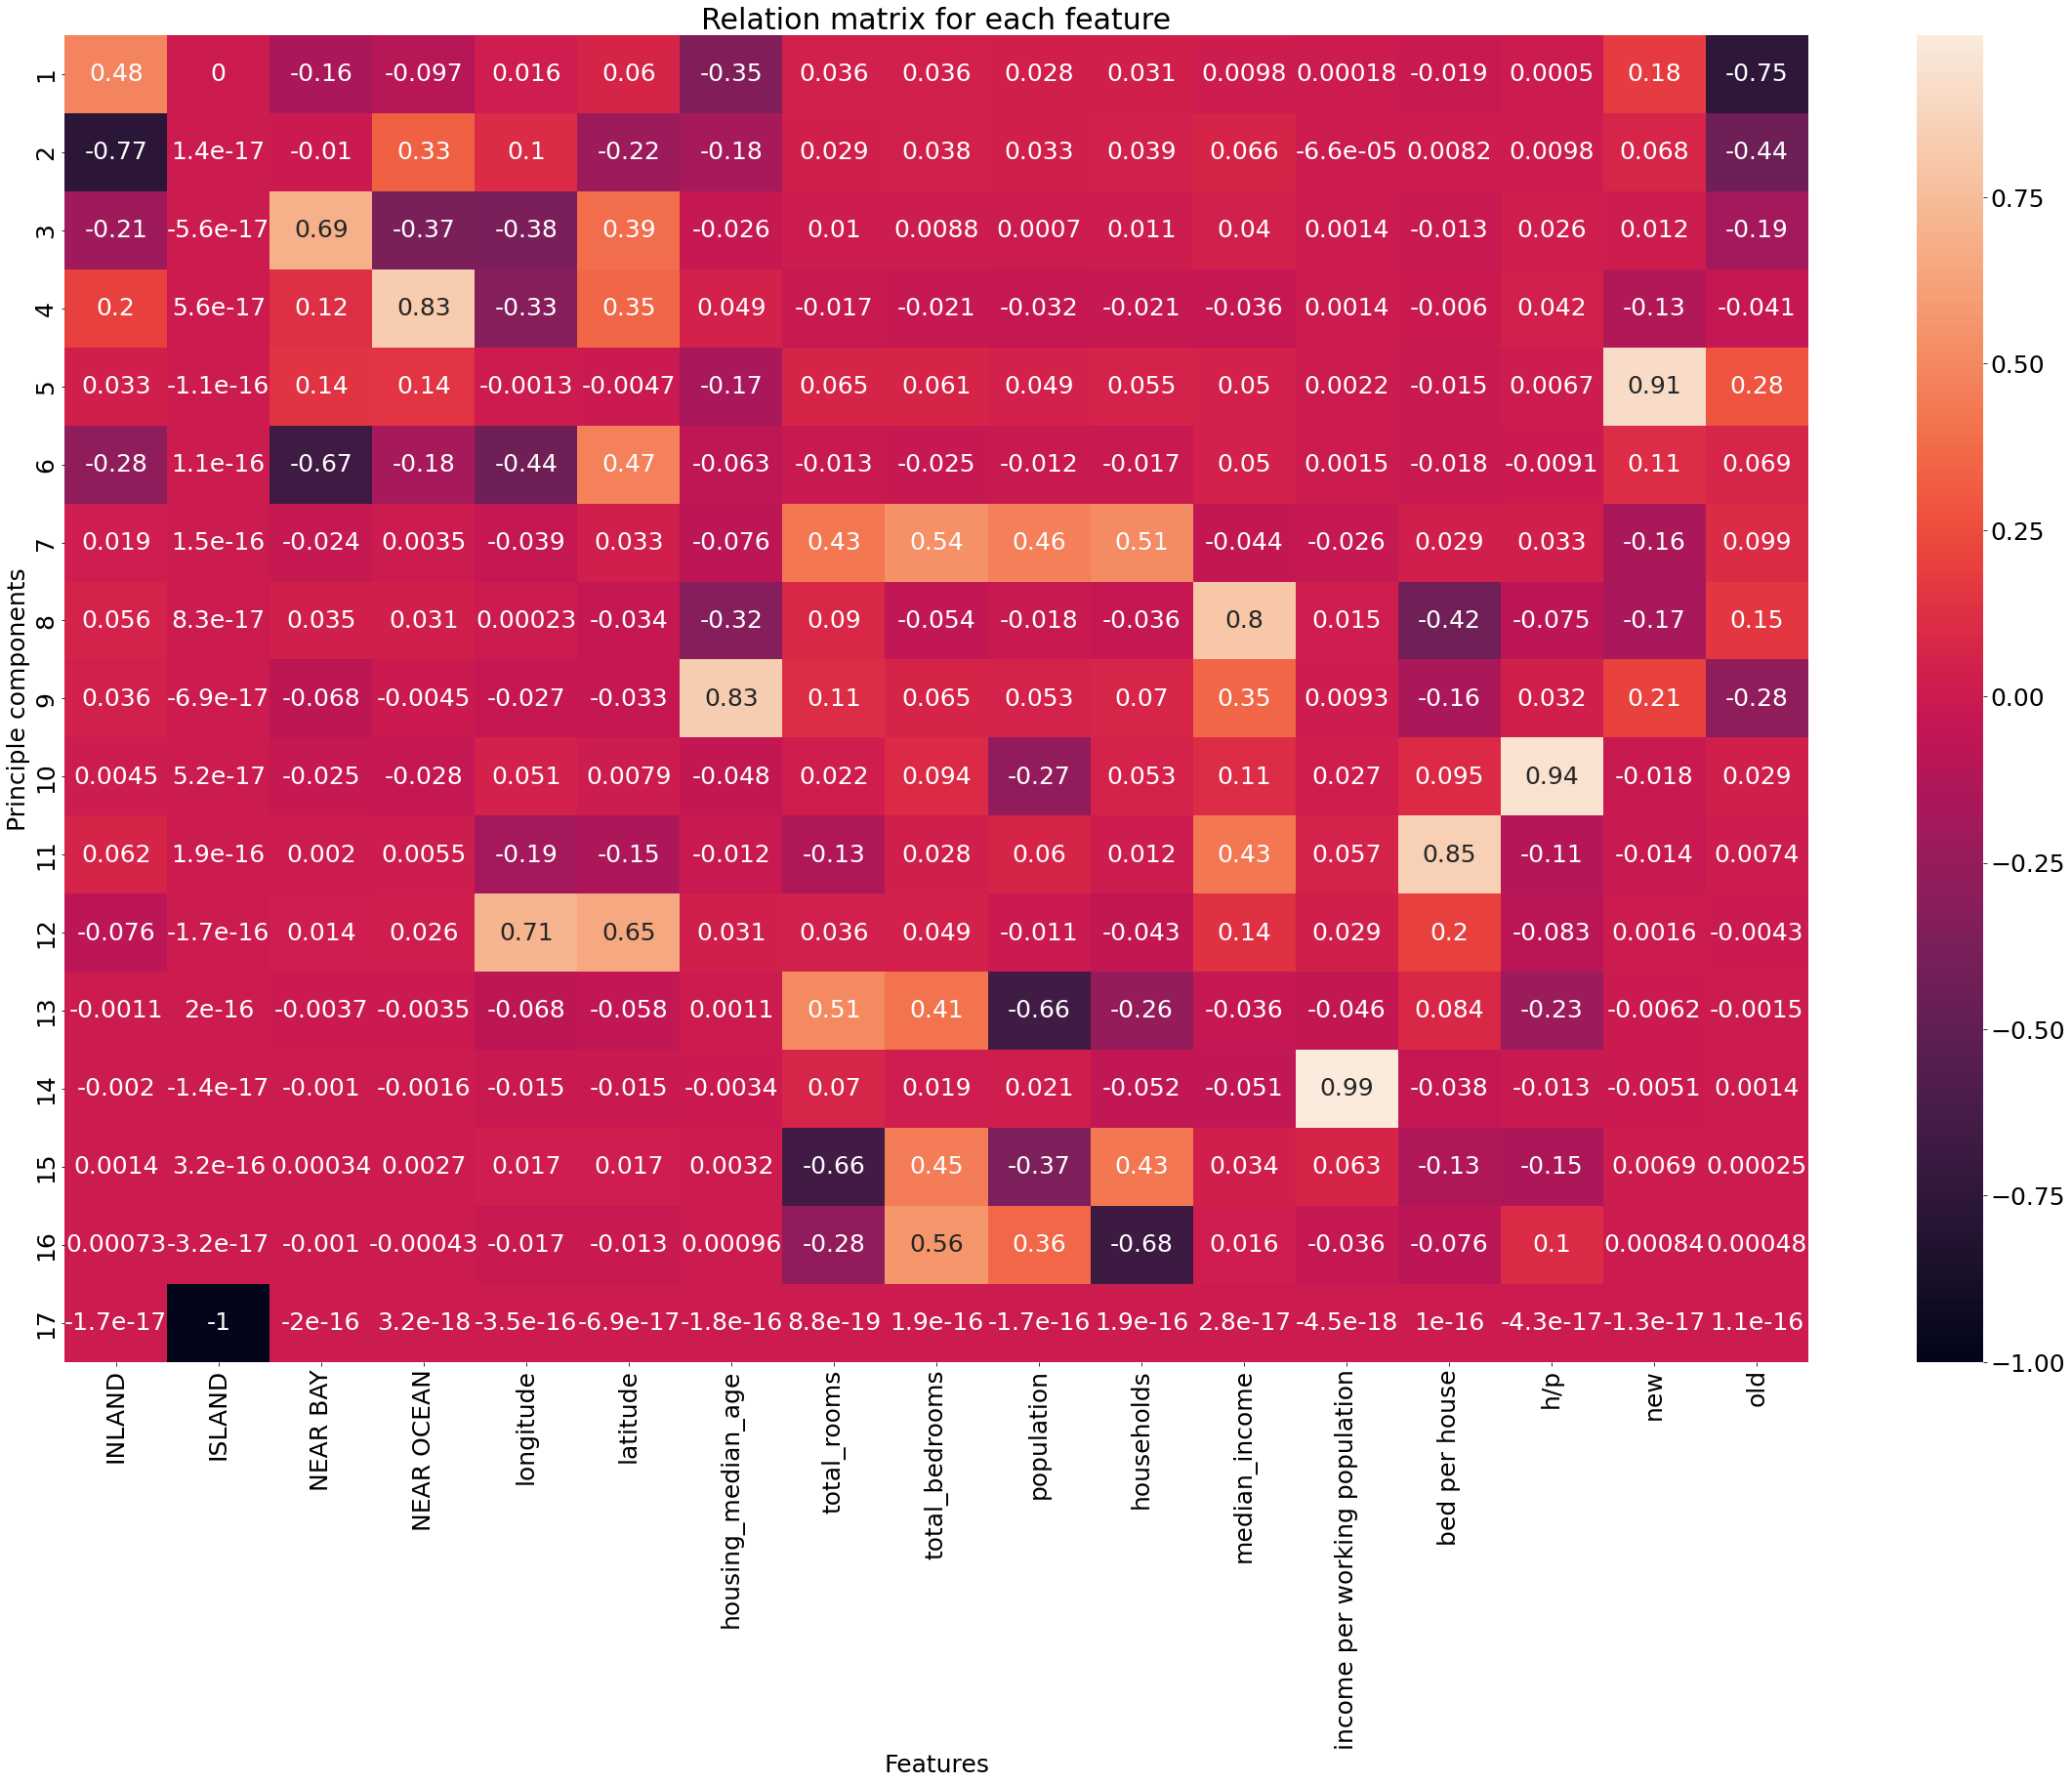

In [46]:
matplotlib.rcParams.update({'font.size': 25})

pca = PCA(n_components=None)
pca.fit(X_train)

plt.figure(figsize=(40,25))
sns.heatmap(pca.components_,annot=True,xticklabels=df.drop('median_house_value',axis=1).columns,yticklabels=[str(i) for i in range(1,len(df.columns))])
plt.xlabel('Features')
plt.ylabel('Principle components')
plt.title('Relation matrix for each feature')
plt.show()

matplotlib.rcParams.update({'font.size': 10})

## Modelling

### Linear regression with most corelated features

In [47]:
def regresssor_model(X,y,estimator):
   
    regressor = estimator()
    regressor.fit(X,y)
    lr_rmse = np.sqrt(mean_squared_error(y,regressor.predict(X)))
    cv_regressor = cross_val_score(cv=10, X=X, y=y, estimator=regressor, scoring='r2')
    print('The cross validated accuracy  - ' + str(100*cv_regressor.mean()))
    print('The corss validated variance is - ' + str(100*cv_regressor.std()))
    return regressor

def evaluate(y_pred,y_test,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(y_test) - (y_pred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(y_test - y_pred)
    print("root mean squared error for test data   is " + str(np.sqrt(mean_squared_error(y_test,y_pred))))
    plt.show()



#polynomial regression with all features

def to_poly(degree,X_train,X_test):
    poly = PolynomialFeatures(degree=degree)
    X1 = poly.fit_transform(X_train)
    x2 = poly.fit_transform(X_test)
    return (X1,x2)

Linear regression with most co related features
The cross validated accuracy  - 41.78941691392167
The corss validated variance is - 1.628238441507008
root mean squared error for test data   is 75403.47835305026


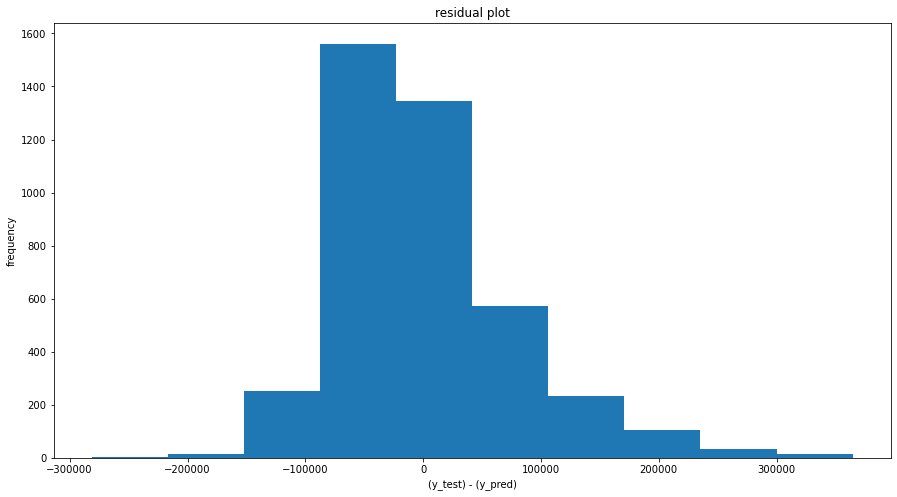

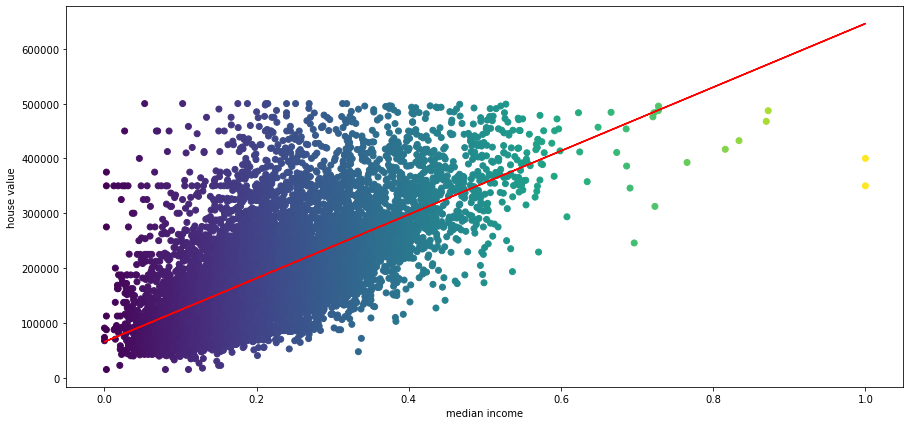

In [48]:
print('Linear regression with most co related features')

l = regresssor_model(X_train[:,[11]],y_train,LinearRegression)
evaluate(l.predict(X_test[:,[11]]),y_test,l)

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,11], y_train, c =X_train[:,11])
plt.plot(X_train[:,11], l.predict(X_train[:,11:12]), color='red')
plt.xlabel('median income')
plt.ylabel('house value')

plt.show()

### Linear regression with all features

Linear regression with all features
The cross validated accuracy  - 63.88214167728836
The corss validated variance is - 1.5845319835035132
root mean squared error for test data   is 59249.16599041469


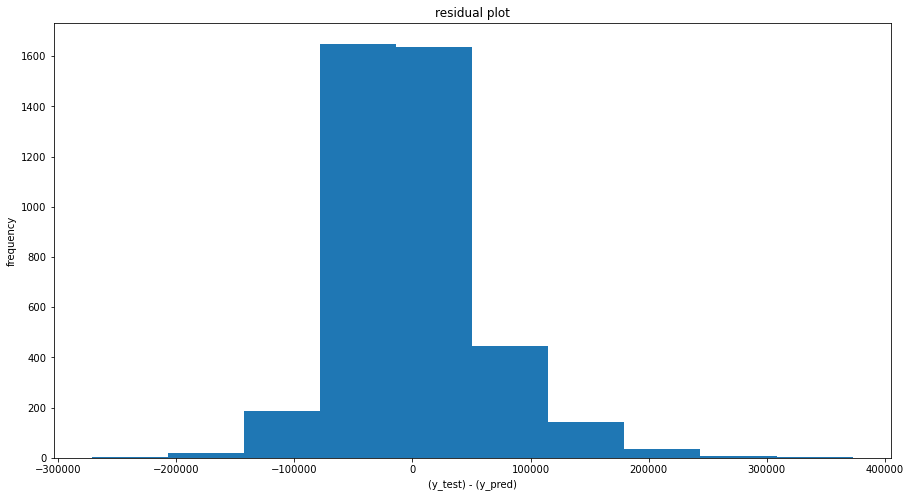

In [49]:
print('Linear regression with all features')

l = regresssor_model(X_train,y_train,LinearRegression)
evaluate(l.predict(X_test),y_test,l)

### Polynomial regression with most corelated features

The cross validated accuracy  - 41.77949089994947
The corss validated variance is - 1.640728454809125
root mean squared error for test data   is 75397.1810960991


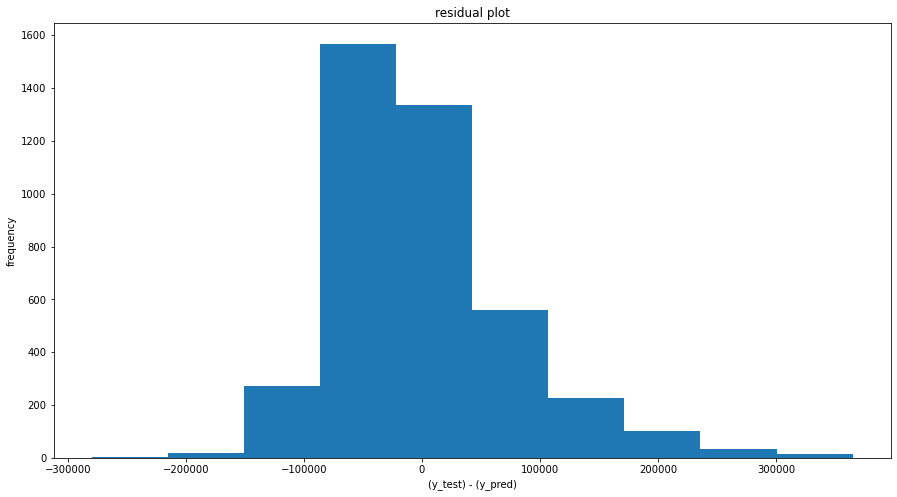

In [50]:
X_train_poly,X_test_poly = to_poly(2,X_train[:,11:12], X_test[:,11:12])
l = regresssor_model(X_train_poly,y_train,LinearRegression)
evaluate(l.predict(X_test_poly),y_test,l)

### Polynomial regression with all features

The cross validated accuracy  - -652.0673678308509
The corss validated variance is - 1572.2867639781862
root mean squared error for test data   is 511069293079171.44


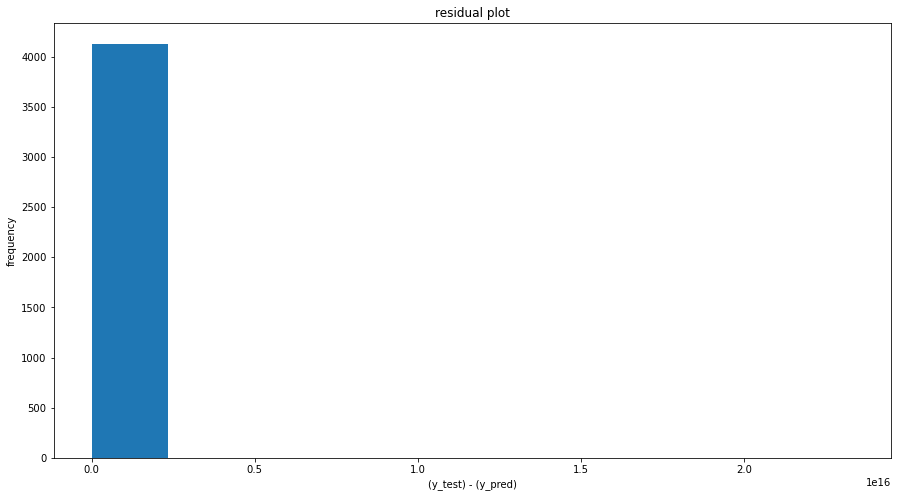

In [51]:
X_train_poly,X_test_poly = to_poly(3,X_train,X_test)
l = regresssor_model(X_train_poly, y_train, LinearRegression)
evaluate(l.predict(X_test_poly),y_test,l)

Di sini kita dapat melihat bahwa model polinomial memiliki varians yang tinggi dan karenanya merupakan model yang buruk

## Stepwise Regression (backward elimination)
- for 5% significance level
- checking pvalues

In [52]:
X_train_ols = np.append(np.ones(X_train.shape[0]).reshape(X_train.shape[0],1),X_train,axis=1)

In [53]:
X_test_ols = np.append(np.ones(X_test.shape[0]).reshape(X_test.shape[0],1),X_test,axis=1)

### Pvalues

In [54]:
# Library
import statsmodels.regression.linear_model as sm

def backward_elimination(X,y_dependent,sl):
    var = np.arange(X.shape[1])
    X_ols_array = X[:,var]
    regressor = sm.OLS(y_dependent,X_ols_array).fit()
    
    for i in range(sum(regressor.pvalues>sl)):
        if sum(regressor.pvalues>sl)>0:
            arg = regressor.pvalues.argmax()
            var = np.delete(var,arg)
            X_ols_array = X[:,var]
            regressor = sm.OLS(y_dependent,X_ols_array).fit()
    return (var[:],regressor)

features,regressor = backward_elimination(X_train_ols,y_train,0.10)

In [55]:
features

array([ 0,  1,  2,  3,  5,  6,  7,  9, 12, 13, 14, 15, 17])

In [56]:
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1567.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:11:05   Log-Likelihood:            -1.1939e+05
No. Observations:                9637   AIC:                         2.388e+05
Df Residuals:                    9625   BIC:                         2.389e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.655e+05   1.51e+04     10.932      0.000    1.36e+05    1.95e+05
x1         -3.035e+04   2129.050    -14.257      0.000   -3.45e+04   -2.62e+04
x2          8.372e-10   3.58e-11     23.380      0.000    7.67e-10    9.07e-10
x3         -8509.5771   2339.401     -3.638      0.000   -1.31e+04   -3923.858
x4         -2.467e+05    1.2e+04    -20.621      0.000    -2.7e+05   -2.23e+05
x5          -2.19e+05    1.1e+04    -19.875      0.000   -2.41e+05   -1.97e+05
x6          6.176e+04   4699.967     13.141      0.000    5.26e+04     7.1e+04
x7          6.264e+04   8230.980      7.610      0.000    4.65e+04    7.88e+04
x8              6e+05   7862.980     76.311      0.000    5.85e+05    6.15e+05
x9         -1.517e+05    3.7e+04     -4.098      0.000   -2.24e+05   -7.92e+04
x10         1.556e+05   1.24e+04     12.510      0.000    1.31e+05     1.8e+05
x11         3.198e+05   9046.466     35.350      0.000    3.02e+05    3.38e+05
x12        -8275.6669   2170.394     -3.813      0.000   -1.25e+04   -4021.239
==============================================================================
Omnibus:                     1691.320   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4383.850
Skew:                           0.963   Prob(JB):                         0.00
Kurtosis:                       5.685   Cond. No.                     1.93e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
np.sqrt(mean_squared_error(y_test,regressor.predict(X_test_ols[:,features])))

59305.01167252527

### Regularization
- Di sini terapkan teknik dasar l1 dan l2 untuk memeriksa akurasi dasar

### Coefficients comparison for linear regression

Text(0.5, 1.0, 'coeff graph')

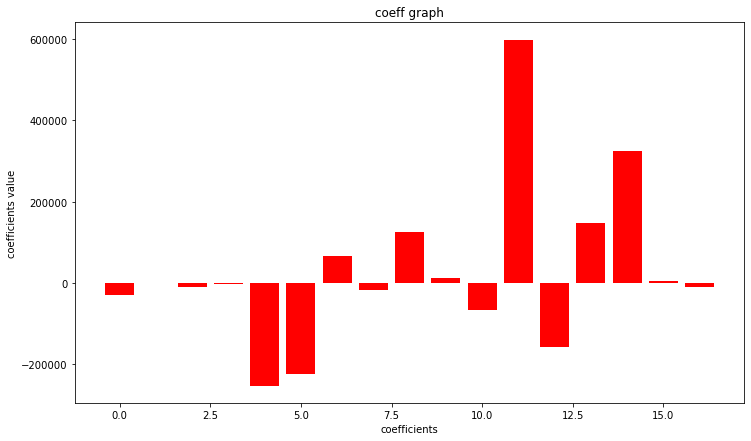

In [58]:
l = LinearRegression()
plt.figure(figsize=(12,7))
l.fit(X_train,y_train)
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

## Lasso

The cross validated accuracy  - 63.88911256657342
The corss validated variance is - 1.5776687867824177
root mean squared error for test data   is 59267.55196374889


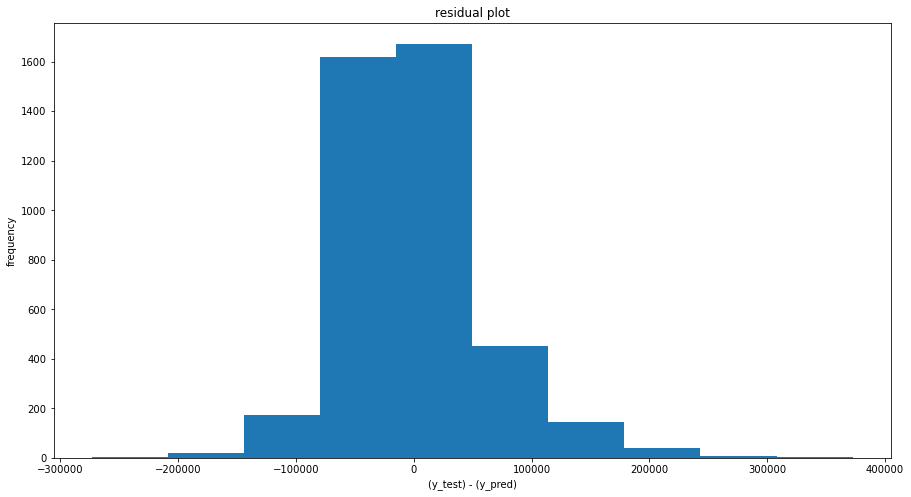

[]

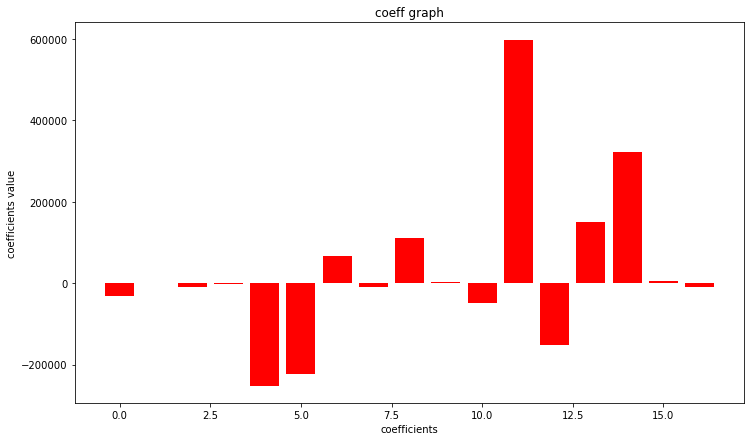

In [59]:
l = regresssor_model(X_train,y_train,Lasso)

evaluate(l.predict(X_test),y_test,l)
plt.figure(figsize=(12,7))

plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

## Ridge

The cross validated accuracy  - 63.9121369333428
The corss validated variance is - 1.5420462748108905
root mean squared error for test data   is 59365.661946006345


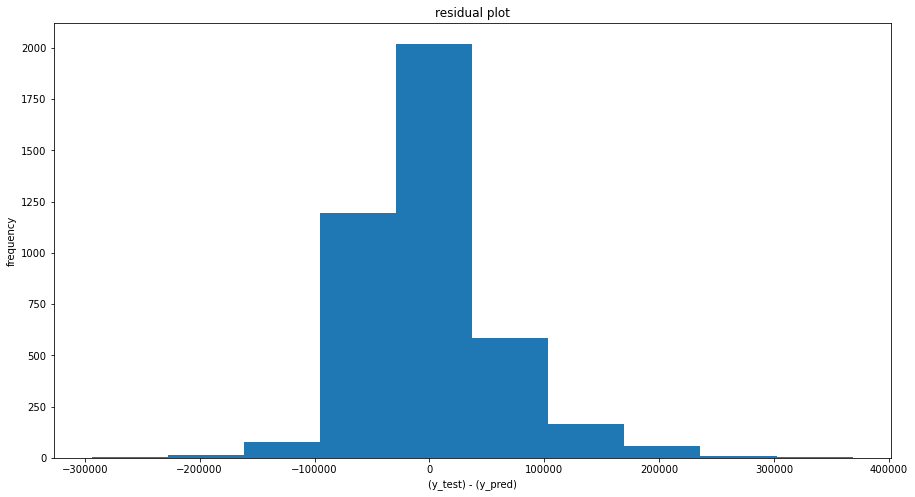

Text(0.5, 1.0, 'coeff graph')

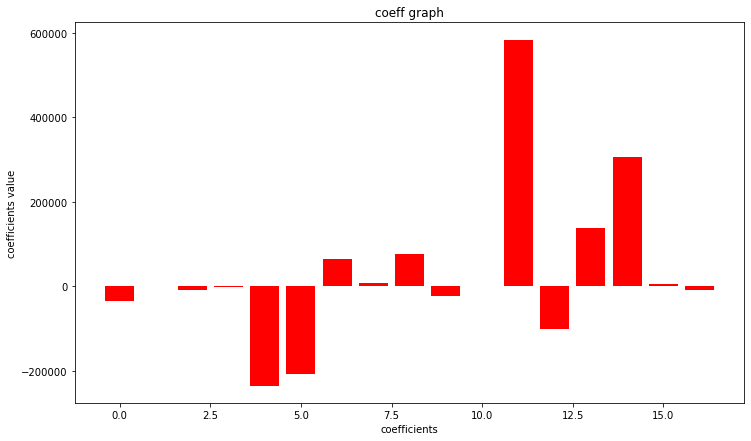

In [61]:
l = regresssor_model(X_train,y_train,Ridge)
evaluate(l.predict(X_test),y_test,l)
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

### Decision Trees

In [62]:
dt = regresssor_model(X_train,y_train,DecisionTreeRegressor)
dt.fit(X_train,y_train)
print('mean squared errror is', end='\t-')
np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))

The cross validated accuracy  - 52.043962389069605
The corss validated variance is - 2.3226523466729034
mean squared errror is	-

66480.83563082734

### Cross Validation

In [63]:
cv = cross_val_score(dt,X_train,y_train,scoring='r2',cv=10)
cv.std()
cv.mean()

0.5169870523266649

### Parameter Tuning

In [64]:
params =[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

# Library
from sklearn.model_selection import GridSearchCV

gc = GridSearchCV(dt,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(X_train,y_train)
gc.best_estimator_

DecisionTreeRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=20,
                      min_samples_split=7)

In [65]:
gc.best_score_

0.6490019040510366

In [66]:
dt = gc.best_estimator_
dt.fit(X_train,y_train)
print('root mean squared error')
np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))

root mean squared error


59310.43693302211

### Feature Importance by decision trees

Text(0.5, 1.0, 'feature importance')

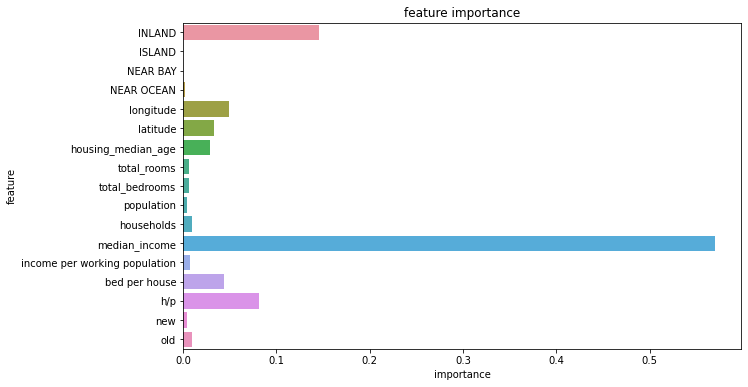

In [67]:
plt.figure(figsize=(10,6))

data = pd.DataFrame({'feature':df.columns[df.columns!='median_house_value'].values,"importance":dt.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

ini adalah feature-feature yg paling penting dalam mempengaruhi model untuk memprediksi Median House Value

## Esemble Learning

### Random forest

In [68]:
rg = RandomForestRegressor(n_estimators=30)
rg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

#### Root mean square value

In [69]:
RMS_rg_before = np.sqrt(mean_squared_error(y_test,rg.predict(X_test)))
RMS_rg_before

48392.932074255405

#### R Squared

In [70]:
R_square_before = rg.score(X_test,y_test)
R_square_before

0.7599646848941687

(array([   3.,    3.,   53.,  440., 2626.,  770.,  181.,   40.,    9.,
           6.]),
 array([-292573.33333333, -230458.33      , -168343.32666667,
        -106228.32333333,  -44113.32      ,   18001.68333333,
          80116.68666667,  142231.69      ,  204346.69333333,
         266461.69666667,  328576.7       ]),
 <BarContainer object of 10 artists>)

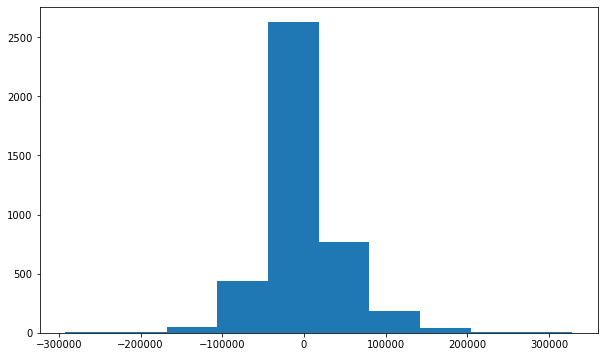

In [71]:
plt.figure(figsize=(10,6))
plt.hist(y_test-rg.predict(X_test))

In [72]:
print('hasil dari Random Forest')
print('hasil score RMS',RMS_rg_before)
print('hasil score R_square',R_square_before)

hasil dari Random Forest
hasil score RMS 48392.932074255405
hasil score R_square 0.7599646848941687


### Grid Search

menggunakan metode Grid Search

In [73]:
params =[{
            'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf' :[1,2,5,7,10],
            'bootstrap':[True,False],
            'max_features':['sqrt','auto']
            
            
        }
]

In [74]:
params

[{'n_estimators': [20, 30, 70, 50, 100, 200, 300, 400, 600, 650, 630, 680],
  'max_depth': [10, 20, 30, 40, 50, 60, 70, 100],
  'min_samples_split': [2, 3, 4, 5, 10],
  'min_samples_leaf': [1, 2, 5, 7, 10],
  'bootstrap': [True, False],
  'max_features': ['sqrt', 'auto']}]

## Model with Best HyperParameter

In [75]:
rg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease= 0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,rg.predict(X_test)))

47629.46273281665

### Root Mean Sqared Error

In [76]:
print(np.sqrt(mean_squared_error(y_test,rg.predict(X_test))))


47629.46273281665


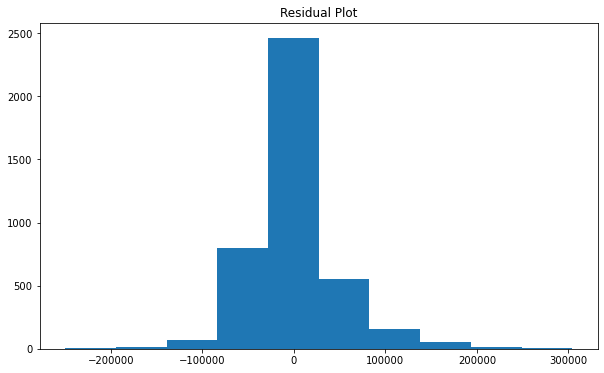

In [77]:
plt.figure(figsize=(10,6))
plt.title('Residual Plot')
plt.hist(y_test-rg.predict(X_test))
plt.show()

### R Squared

In [78]:
print(rg.score(X_test,y_test))

0.7674787577927622


### Best Feature by Random Forest

<AxesSubplot:title={'center':'Feature Importance'}>

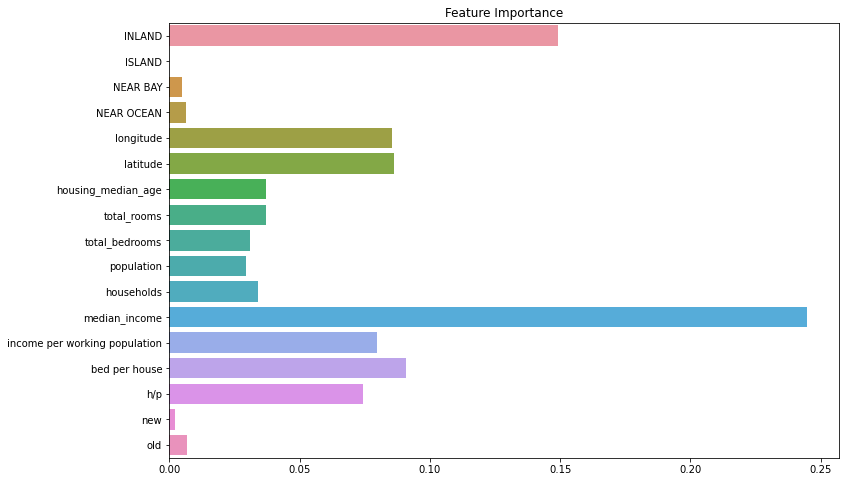

In [79]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':df.columns[df.columns!='median_house_value']},y='feature',x='importance')

In [80]:
rg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=100,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(X_train[:,[0,4,5,6,7,11,12,13,14]],y_train)
rms_value = np.sqrt(mean_squared_error(y_test,rg.predict(X_test[:,[0,4,5,6,7,11,12,13,14]])))
R_squared = rg.score(X_test[:,[0,4,5,6,7,11,12,13,14]],y_test)



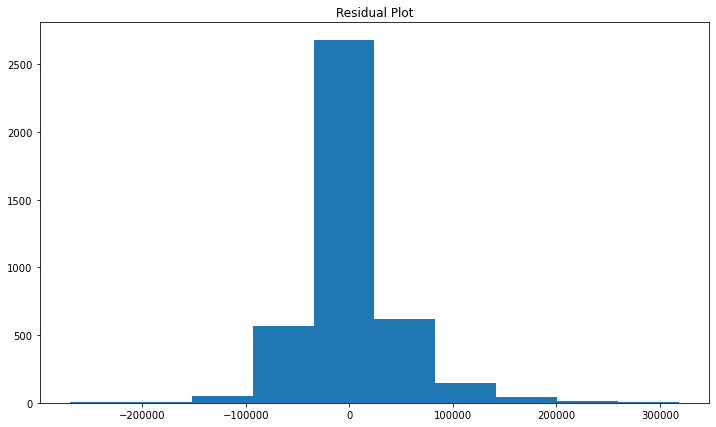

In [81]:
plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(y_test-rg.predict(X_test[:,[0,4,5,6,7,11,12,13,14]]))
plt.show()

In [82]:
print(rms_value)
print(R_squared)

46441.606612702584
0.7789320723808278


In [83]:
# random forest sebelum dan setelah dilakukan feature importance

print('hasil dari Random Forest')
print('hasil score RMS',RMS_rg_before)
print('hasil score R_square',R_square_before)


hasil dari Random Forest
hasil score RMS 48392.932074255405
hasil score R_square 0.7599646848941687


In [84]:
# random forest setelah dilakukan feature importance

print('hasil dari Random Forest feature importance')
print('hasil score RMS',rms_value)
print('hasil score R_square',R_squared)

hasil dari Random Forest feature importance
hasil score RMS 46441.606612702584
hasil score R_square 0.7789320723808278


### Fitting Random forest with best feature and visualizing

In [85]:
rg = RandomForestRegressor(n_estimators=400)
rg.fit(X_train[:,11:12],y_train)

RandomForestRegressor(n_estimators=400)

In [86]:
x_t = np.arange(min(X_test[:,11]),max(X_test[:,11]),0.005)
x_t = x_t.reshape(len(x_t),1)

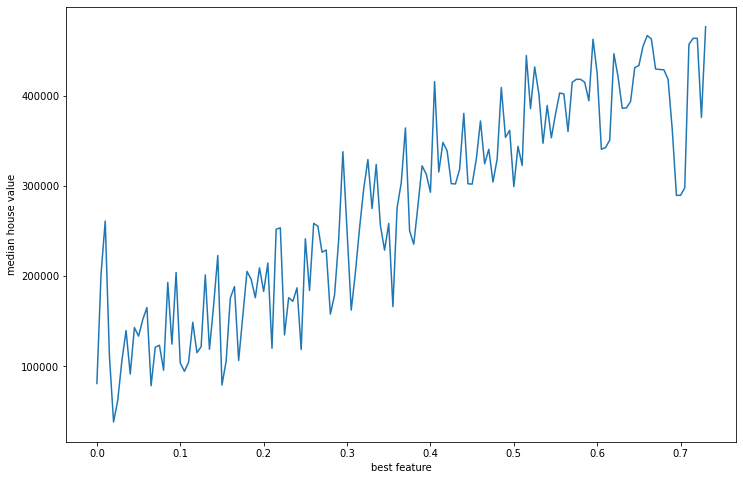

In [87]:
plt.figure(figsize=(12,8))
plt.xlabel("best feature")
plt.ylabel("median house value")
plt.plot(x_t,rg.predict(x_t))

Oleh karena itu kita dapat menyimpulkan bahwa Random forest bisa menjadi model terbaik karena mean squred error (root) rendah dan r kuadrat tinggi.

In [95]:
#save model
import pickle

# Model Pickling
rg.fit(X_train[:,11:12],y_train) # FINAL MODEL
filename = 'Model Final.sav'
pickle.dump(rg,open(filename,'wb'))

# load dataset
house_value_predict = pd.read_csv('data_california_house.csv')

# load model
filename = 'Model Final.sav'
loaded_model = pickle.load(open(filename,'rb'))